# ANALISIS Y MODELOS DE MACHINE LEARNING PREDIOS EN LA CIUDAD DE MEDELLIN

En este notebook se pretende analizar la distribucion de los diferentes predios ubicados en la ciudad de Medellin, su valorizacion y su relacion con respecto a sus diferentes atributos.

Se realiza varios modelos de machine learning donde se busca predecir el valor de los predios de acuerdo con los atributos que contiene el dataset, como el estrato, la matricula, su ubicacion y otros features relevantes.

Puedes conseguir los datos [aquí.](http://medata.gov.co/dataset/informaci%C3%B3n-predios/resource/273e7c47-8386-49a3-be31-36d1bb04f9cf#{view-graph:{graphOptions:{hooks:{processOffset:{},bindEvents:{}}}},graphOptions:{hooks:{processOffset:{},bindEvents:{}}}})

In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data= pd.read_csv("informacion_predios.csv",sep=";")

In [3]:
data.head()

,codcomuna,codbarrio,manzana,cedcat,cbml,matricula,pordes,estrato,urbanizacion,usopredial,indicadoru/r,nropropietarios,nomcomuna,ds_barrio,avaluototal
0,16,4,7,16,16040070016,750217,2.45,0,NUEVA GRANADA,10,U,2,BELEN,GRANADA,11900000.0
1,16,4,7,16,16040070016,750221,1.68,0,NUEVA GRANADA,10,U,1,BELEN,GRANADA,8161000.0
2,16,4,7,16,16040070016,750228,12.50,4,NUEVA GRANADA,1,U,1,BELEN,GRANADA,72818000.0
3,16,4,7,16,16040070016,750234,9.60,4,NUEVA GRANADA,1,U,1,BELEN,GRANADA,82388000.0
4,9,12,54,9,9120540009,751225,27.52,3,--,1,U,1,BUENOS AIRES,EL SALVADOR,20116000.0


In [4]:
data.describe()

,codcomuna,codbarrio,manzana,cedcat,cbml,matricula,pordes,estrato,usopredial,nropropietarios,avaluototal
count,1.032180e+06,1.032180e+06,1.032180e+06,1.032180e+06,1.032180e+06,1.032180e+06,1.032180e+06,1.032180e+06,1.032180e+06,1.032180e+06,1.032180e+06
mean,1.552474e+01,1.304314e+01,3.202230e+01,5.662139e+01,1.565549e+10,6.321638e+07,2.985201e+01,1.915434e+00,3.408362e+00,1.433773e+00,9.237705e+07
std,1.759140e+01,1.837765e+01,8.674765e+01,1.721239e+02,1.768678e+10,2.228325e+08,3.956755e+01,1.819195e+00,3.786521e+00,1.268385e+00,1.031659e+09
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.010010e+09,2.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,2.700000e+04
25%,7.000000e+00,4.000000e+00,5.000000e+00,7.000000e+00,7.240130e+09,5.414588e+05,2.400000e-01,0.000000e+00,1.000000e+00,1.000000e+00,1.205600e+07
50%,1.100000e+01,9.000000e+00,1.500000e+01,1.800000e+01,1.115003e+10,9.793615e+05,3.648000e+00,2.000000e+00,1.000000e+00,1.000000e+00,3.194250e+07
75%,1.400000e+01,1.400000e+01,3.200000e+01,4.500000e+01,1.421030e+10,5.151988e+06,5.000000e+01,3.000000e+00,5.000000e+00,2.000000e+00,7.823500e+07
max,9.000000e+01,9.800000e+01,9.990000e+02,3.222000e+03,9.089001e+10,9.601176e+08,1.000000e+02,6.000000e+00,1.000000e+01,2.620000e+02,6.157997e+11


In [5]:
data.shape # aca podemos identificar que la forma del dataset contiene 15 columnas y 1.032.180 filas

(1032180, 15)

In [6]:
data.isnull().sum()

codcomuna             0
codbarrio             0
manzana               0
cedcat                0
cbml                  0
matricula             0
pordes                0
estrato               0
urbanizacion       2165
usopredial            0
indicadoru/r          0
nropropietarios       0
nomcomuna             0
ds_barrio             0
avaluototal           0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.dtypes

codcomuna            int64
codbarrio            int64
manzana              int64
cedcat               int64
cbml                 int64
matricula            int64
pordes             float64
estrato              int64
urbanizacion        object
usopredial           int64
indicadoru/r        object
nropropietarios      int64
nomcomuna           object
ds_barrio           object
avaluototal        float64
dtype: object

In [9]:
data.nomcomuna.nunique()

21

In [10]:
data.ds_barrio.nunique()

348

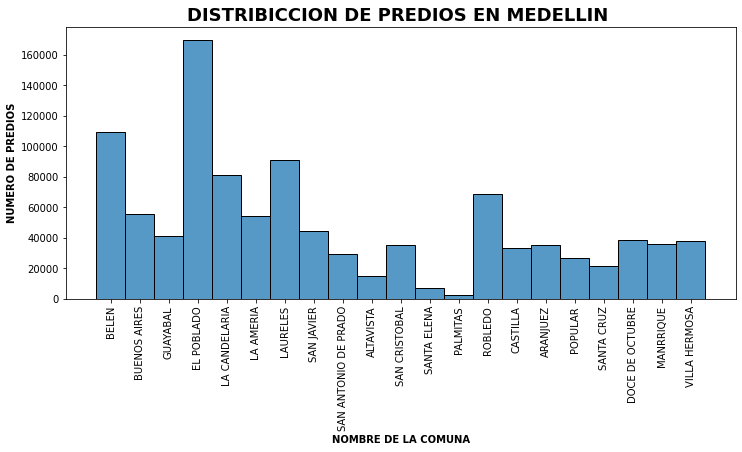

In [11]:
plt.figure(figsize=(12,5))
sns.histplot(x="nomcomuna",data=data)
plt.xticks(rotation=90)
plt.title("DISTRIBICCION DE PREDIOS EN MEDELLIN ",fontsize=18,fontweight="bold")
plt.xlabel("NOMBRE DE LA COMUNA",fontsize=10,fontweight="bold")
plt.ylabel("NUMERO DE PREDIOS",fontsize=10,fontweight="bold")
plt.show()

* En el grafico anterior podemos observar cuales son las comunas de la ciudad de Medellin que contienen mayor numero de predios, el poblado y belen contienen la mayor cantidad de predios de la ciudad.

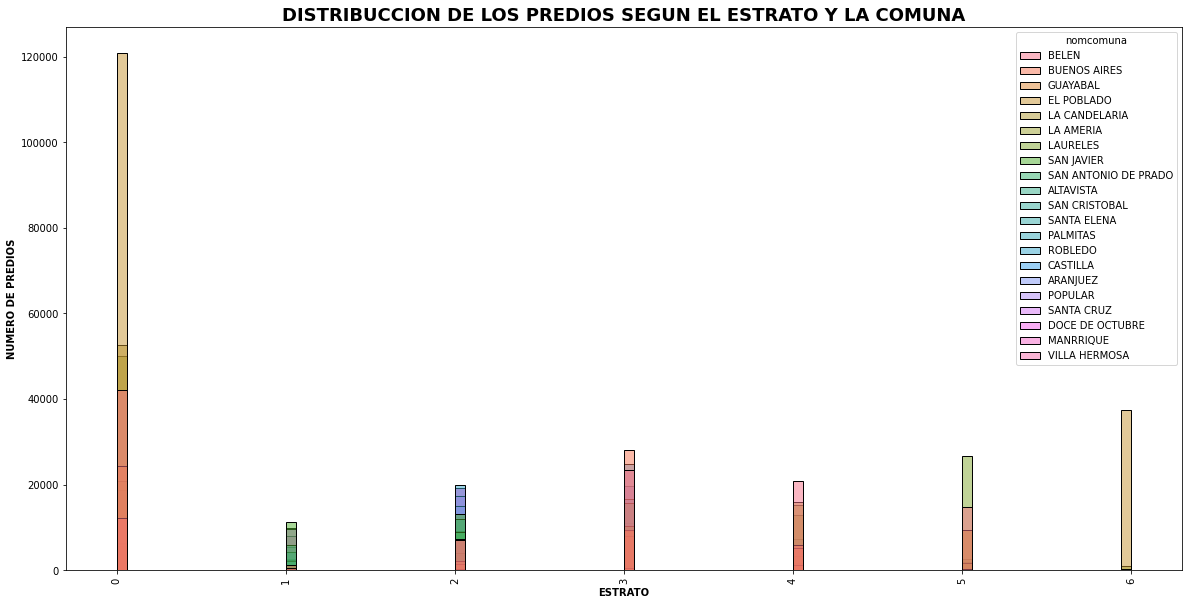

In [12]:
plt.figure(figsize=(20,10))
sns.histplot(x="estrato",data=data, hue=data["nomcomuna"])
plt.xticks(rotation=90)
plt.title("DISTRIBUCCION DE LOS PREDIOS SEGUN EL ESTRATO Y LA COMUNA",fontsize=18,fontweight="bold")
plt.xlabel("ESTRATO",fontsize=10,fontweight="bold")
plt.ylabel("NUMERO DE PREDIOS",fontsize=10,fontweight="bold")
plt.show()

* En el grafico anterior podemos observar la distribucion de los predios de acuerdo con el estrato ademas estan organizadas y compiladas en barras de acuerdo con las comunas de la ciudad.

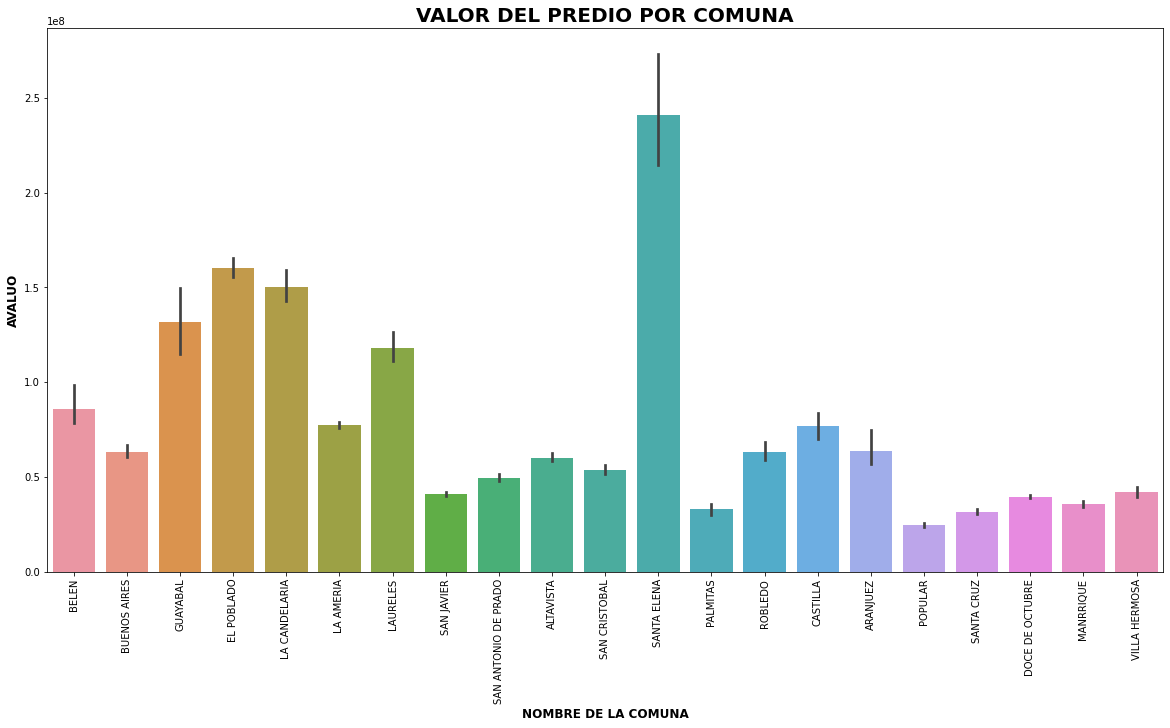

In [13]:
plt.figure(figsize=(20,10))
sns.barplot(x="nomcomuna",y="avaluototal",data=data)
plt.xticks(rotation=90)
plt.title("VALOR DEL PREDIO POR COMUNA", fontsize=20,fontweight="bold")
plt.xlabel("NOMBRE DE LA COMUNA",fontsize=12,fontweight="bold")
plt.ylabel("AVALUO",fontsize=12,fontweight="bold")
plt.show()


* El grafico anterior nos permite identificar los predios de cada comuna segun su avaluo, en dicho grafico identificamos que Santa Elena presenta los predios con mayor avaluo en sus predios y posteriormente lo sigue la comuna del poblado.

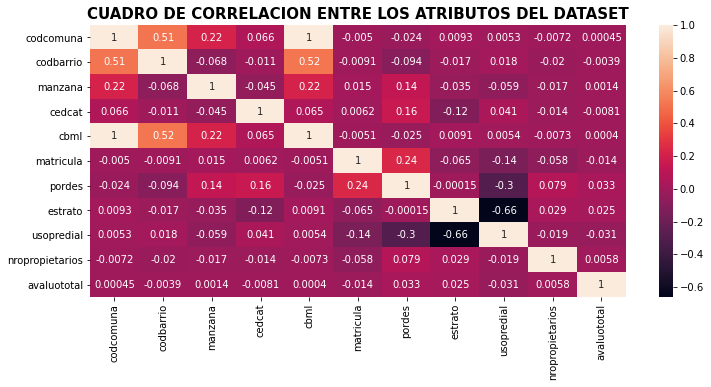

In [14]:
plt.figure(figsize=(12,5))
sns.heatmap(data.corr(),annot=True)
plt.title("CUADRO DE CORRELACION ENTRE LOS ATRIBUTOS DEL DATASET",fontsize=15,fontweight="bold")
plt.show()

* El cuadro de correlacion nos permite identificar que atributos del dataset se relacionan entre si de manera positiva,negativa  o neutral, esto nos ayuda a cuales atributos se pueden relacionar de manera acorde con el objetivo que decidamos predecir a traves de los modelos.

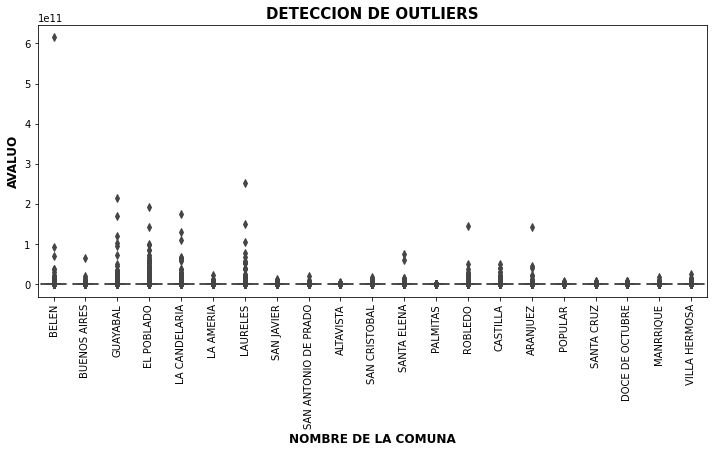

In [15]:
plt.figure(figsize=(12,5))
sns.boxplot(x="nomcomuna",y="avaluototal",data=data)
plt.xticks(rotation=90)
plt.title("DETECCION DE OUTLIERS",fontsize=15,fontweight="bold")
plt.xlabel("NOMBRE DE LA COMUNA",fontsize=12,fontweight="bold")
plt.ylabel("AVALUO",fontsize=12,fontweight="bold")
plt.show()

* En el grafico anterior podemos observar como dentro del dataset existen multiples valores atipicos que no permiten identificar de manera clara el grafico de cajas y bigotes para poder observar la distribucion de los datos de acuerdo a su avaluo y comuna.

* Para limpiar nuestros datos de estos valores atipicos utilizamos el metodo del Rango Intercuartilico.

In [16]:
minimo= data.quantile(0.25)
maximo= data.quantile(0.75)
IQR= maximo-minimo
data2= data[~((data<(minimo -1.5*IQR))|(data>(maximo+1.5*IQR))).any(axis=1)]

<ipython-input-16-c5ad61fdf070>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data2= data[~((data<(minimo -1.5*IQR))|(data>(maximo+1.5*IQR))).any(axis=1)]
<ipython-input-16-c5ad61fdf070>:4: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version.  Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  data2= data[~((data<(minimo -1.5*IQR))|(data>(maximo+1.5*IQR))).any(axis=1)]


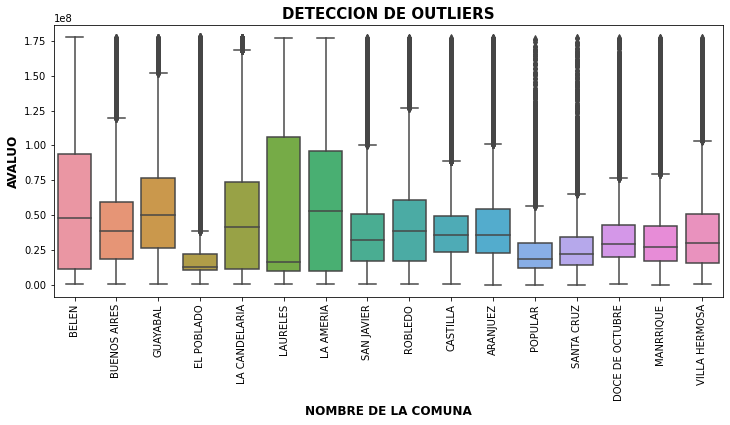

In [17]:
plt.figure(figsize=(12,5))
sns.boxplot(x="nomcomuna",y="avaluototal",data=data2)
plt.xticks(rotation=90)
plt.title("DETECCION DE OUTLIERS",fontsize=15,fontweight="bold")
plt.xlabel("NOMBRE DE LA COMUNA",fontsize=12,fontweight="bold")
plt.ylabel("AVALUO",fontsize=12,fontweight="bold")
plt.show()

In [18]:
print(f"Al deshacernos de los valores atipicos se pierden {data.size-data2.size} de registros")

Al deshacernos de los valores atipicos se pierden 5624745 de registros


In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LassoCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.preprocessing import StandardScaler

# MODELO REGRESION LINEAL

Es hora de aplicar Modelos de Aprendizaje Automatico que nos ayuden a predecir los valores futuros de acuerdo con el estrato, comuna, matricula entre otros atributos.

Como modelo benchmark utilizamos un modelo de regresion lineal, el cual nos ayudara para realizar comparaciones con modelos más avanzados para evaluar el performance de los modelos.


In [20]:
X= data2.drop(columns=["urbanizacion","nomcomuna","ds_barrio","avaluototal","indicadoru/r"])
y= data2["avaluototal"]

# Separamos las variables predictoras y la variable a predecir

In [21]:
scl= StandardScaler()
X= scl.fit_transform(X)

# Escalamos los datos con el fin de evitar que las diferentes unidades de los valores afecten el modelo

In [22]:
Xtrain,Xtest,ytrain,ytest= train_test_split(X,y,test_size=0.30,random_state=42)

In [23]:
linear= LinearRegression()

In [25]:
linear.fit(Xtrain,ytrain)

LinearRegression()

In [26]:
predlinear= linear.predict(Xtest)
predlineartrain= linear.predict(Xtrain)

In [27]:
print("R2 en train =",round(r2_score(ytrain,predlineartrain),2))
print("RMSE en train=",round(np.sqrt(mean_squared_error(ytrain,predlineartrain)),2))

print("R2 en test =",round(r2_score(ytest,predlinear),2))
print("RMSE en test=",round(np.sqrt(mean_squared_error(ytest,predlinear)),2))

R2 en train = 0.53
RMSE en train= 29235410.64
R2 en test = 0.53
RMSE en test= 29105132.54


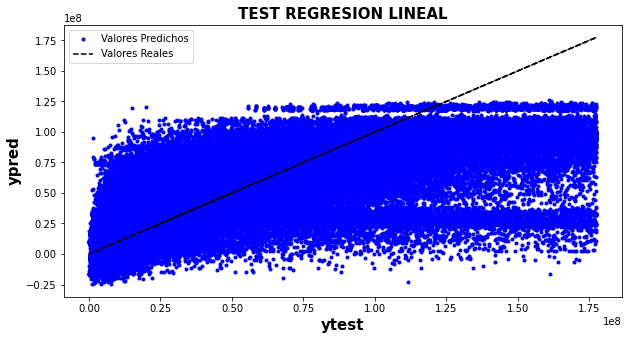

In [28]:
plt.figure(figsize=(10,5))

plt.plot(ytest,predlinear,"b.",label="Valores Predichos")
plt.plot(ytest,ytest,"k--", label="Valores Reales")
plt.xlabel("ytest",fontsize=15,fontweight="bold")
plt.ylabel("ypred",fontsize=15,fontweight="bold")
plt.title("TEST REGRESION LINEAL",fontsize=15,fontweight="bold")
plt.legend()
plt.show()

# MODELO RANDOM FOREST

In [29]:
random= RandomForestRegressor()

In [30]:
random.fit(Xtrain,ytrain)

RandomForestRegressor()

In [31]:
predrandom= random.predict(Xtest)
predrandomtrain= random.predict(Xtrain)

In [32]:
print("R2 en train =",round(r2_score(ytrain,predrandomtrain)))
print("RMSE en train=",round(np.sqrt(mean_squared_error(ytrain,predrandomtrain)),5))


print("R2 en test =",round(r2_score(ytest,predrandom),2))
print("RMSE en test=",round(np.sqrt(mean_squared_error(ytest,predrandom)),2))

R2 en train = 1
RMSE en train= 5458534.10702
R2 en test = 0.88
RMSE en test= 14653146.55


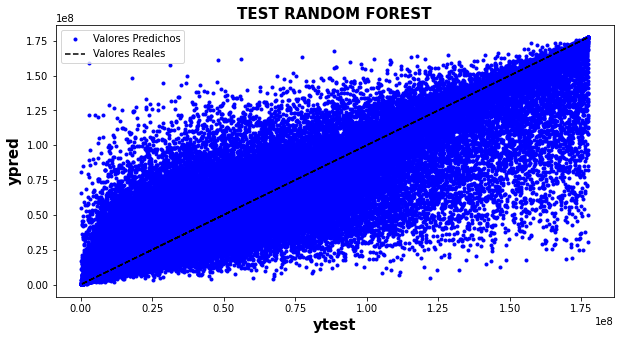

In [33]:
plt.figure(figsize=(10,5))

plt.plot(ytest,predrandom,"b.",label="Valores Predichos")
plt.plot(ytest,ytest,"k--", label="Valores Reales")
plt.xlabel("ytest",fontsize=15,fontweight="bold")
plt.ylabel("ypred",fontsize=15,fontweight="bold")
plt.title("TEST RANDOM FOREST",fontsize=15,fontweight="bold")
plt.legend()
plt.show()

C:\Users\UNBOUND\miniconda3\envs\unbound\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


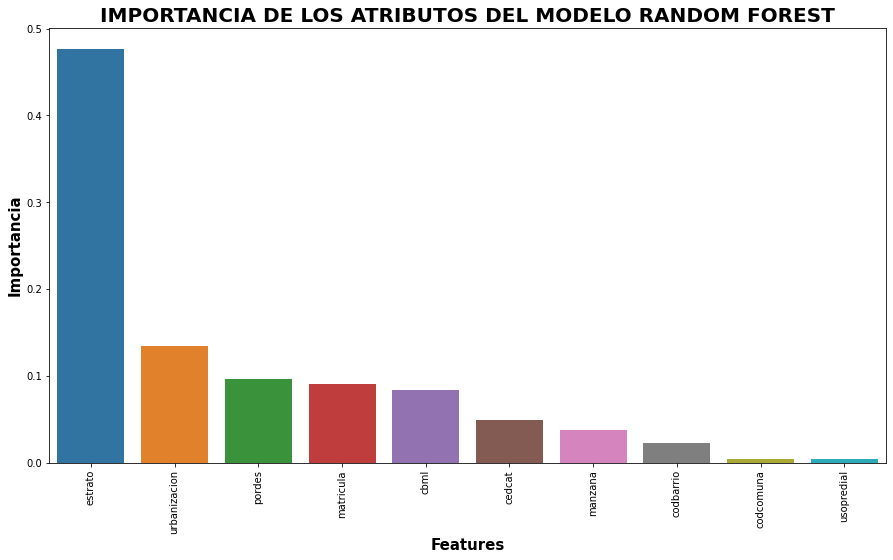

In [34]:
importances = random.feature_importances_
columns = data2.columns
indices = np.argsort(importances)[::-1]

plt.figure(figsize = (15,8))
sns.barplot(columns[indices], importances[indices])
plt.title("IMPORTANCIA DE LOS ATRIBUTOS DEL MODELO RANDOM FOREST", fontsize=20,fontweight="bold")
plt.xticks(rotation=90)
plt.xlabel("Features",fontsize=15,fontweight="bold")
plt.ylabel("Importancia",fontsize=15,fontweight="bold")
plt.show()

# MODELO LASSO & RIDGE

In [35]:
from sklearn.linear_model import LassoCV, RidgeCV

In [36]:
lasso= LassoCV(cv=5)

In [37]:
lasso.fit(Xtrain,ytrain)

LassoCV(cv=5)

In [38]:
lassopred= lasso.predict(Xtest)

In [39]:
print("R2 en test =",round(r2_score(ytest,lassopred),2))
print("RMSE en test=",round(np.sqrt(mean_squared_error(ytest,lassopred)),2))

R2 en test = 0.53
RMSE en test= 29105265.51


In [40]:
ridge= RidgeCV(cv=5)

In [41]:
ridge.fit(Xtrain,ytrain)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=5)

In [42]:
ridpred= ridge.predict(Xtest)

In [43]:
print("R2 en test =",round(r2_score(ytest,ridpred),2))
print("RMSE en test=",round(np.sqrt(mean_squared_error(ytest,ridpred)),2))

R2 en test = 0.53
RMSE en test= 29105068.8


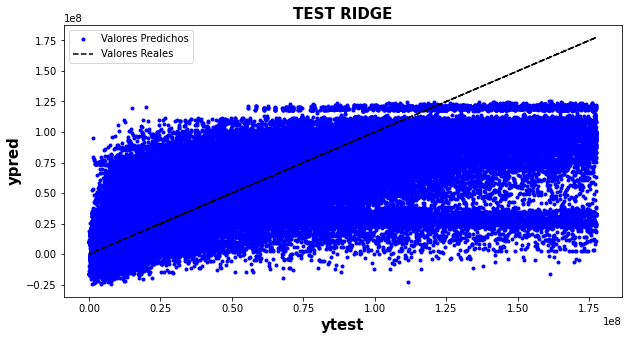

In [44]:
plt.figure(figsize=(10,5))

plt.plot(ytest,ridpred,"b.",label="Valores Predichos")
plt.plot(ytest,ytest,"k--", label="Valores Reales")
plt.xlabel("ytest",fontsize=15,fontweight="bold")
plt.ylabel("ypred",fontsize=15,fontweight="bold")
plt.title("TEST RIDGE",fontsize=15,fontweight="bold")
plt.legend()
plt.show()

# MODELO XGBOOST

In [45]:
from xgboost import XGBRFRegressor

In [46]:
xb= XGBRFRegressor()

In [47]:
xb.fit(Xtrain,ytrain)

XGBRFRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
               colsample_bytree=1, gamma=0, gpu_id=-1, importance_type='gain',
               interaction_constraints='', max_delta_step=0, max_depth=6,
               min_child_weight=1, missing=nan, monotone_constraints='()',
               n_estimators=100, n_jobs=8, num_parallel_tree=100,
               objective='reg:squarederror', random_state=0, reg_alpha=0,
               scale_pos_weight=1, tree_method='exact', validate_parameters=1,
               verbosity=None)

In [48]:
predxb= xb.predict(Xtest)

In [49]:
print("R2 en test =",round(r2_score(ytest,predxb),2))
print("RMSE en test=",round(np.sqrt(mean_squared_error(ytest,predxb)),2))

R2 en test = 0.67
RMSE en test= 24364634.6


# CONCLUSION

Al analizar la informacion de los diferentes modelos podemos observar como el Modelo de Random Forest nos presenta unas excelentes metricas a la hora de realizar la evaluacion del modelo, su R cuadrado esta alrededor del 0.88 lo que nos indica que las variables independientes explican la variable predictora en un 88% ademas el error en los avaluos es un valor pequeño entre los 14 y 15 millones.

Se intentaron otros modelos para seguir realizando las comparaciones y elegir el mejor modelo para realizar dichas predicciones, se intento modelos como Ridge y xgboost donde la evaluacion de esos modelos no representan una mejora con respecto al random forest.

Este modelo podra ser utilizado para predecir valores de diferentes predios ubicados en diferentes zonas comunales de la ciudad de Medellin, con diferentes estratos y otros atributos que ayudaran a saber su precio estimado muy cerca a hechos reales.